## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [36]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [37]:
train, test = keras.datasets.cifar10.load_data()

In [38]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [39]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [40]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [41]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-4
EPOCHS = 50
BATCH_SIZE = 512
MOMENTUM = [0.2, 0.5, 0.75, 0.95]
NESTEROV = [True, False]

In [42]:
"MTM-%s-%s" % (str(momentum_val), str(nesterov_val))

'MTM-0.95-False'

In [43]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for momentum_val in MOMENTUM:
    for nesterov_val in NESTEROV:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with MOMENTUM = %.6f" % (momentum_val))
        print("NESTEROV = ", nesterov_val)
        model = build_mlp(input_shape = x_train.shape[1:])
        model.summary()
        optimizer = keras.optimizers.SGD(lr = LEARNING_RATE, nesterov = nesterov_val, momentum = momentum_val)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = "MTM-%s-%s" % (str(momentum_val), str(nesterov_val))
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with MOMENTUM = 0.200000
NESTEROV =  True
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
98/98 [==============================] - 2s 17ms/step

Epoch 1/50
98/98 [==============================] - 2s 16ms/step - loss: 2.3633 - accuracy: 0.1175 - val_loss: 2.3437 - val_accuracy: 0.1182
Epoch 2/50
98/98 [==============================] - 1s 15ms/step - loss: 2.3335 - accuracy: 0.1229 - val_loss: 2.3212 - val_accuracy: 0.1253
Epoch 3/50
98/98 [==============================] - 1s 15ms/step - loss: 2.3155 - accuracy: 0.1264 - val_loss: 2.3070 - val_accuracy: 0.1306
Epoch 4/50
98/98 [==============================] - 1s 15ms/step - loss: 2.3034 - accuracy: 0.1324 - val_loss: 2.2968 - val_accuracy: 0.1366
Epoch 5/50
98/98 [==============================] - 1s 15ms/step - loss: 2.2942 - accuracy: 0.1375 - val_loss: 2.2887 - val_accuracy: 0.1423
Epoch 6/50
98/98 [==============================] - 1s 15ms/step - loss: 2.2865 - accuracy: 0.1411 - val_loss: 2.2818 - val_accuracy: 0.1445
Epoch 7/50
98/98 [==============================] - 1s 15ms/step - loss: 2.2798 - accuracy: 0.1464 - val_loss: 2.2755 - val_accuracy: 0.1519
Epoch 8/50
98

98/98 [==============================] - 2s 16ms/step - loss: 2.4135 - accuracy: 0.0986 - val_loss: 2.3564 - val_accuracy: 0.1034
Epoch 2/50
98/98 [==============================] - 1s 15ms/step - loss: 2.3247 - accuracy: 0.1075 - val_loss: 2.3036 - val_accuracy: 0.1131
Epoch 3/50
98/98 [==============================] - 1s 15ms/step - loss: 2.2883 - accuracy: 0.1205 - val_loss: 2.2768 - val_accuracy: 0.1238
Epoch 4/50
98/98 [==============================] - 2s 15ms/step - loss: 2.2677 - accuracy: 0.1325 - val_loss: 2.2597 - val_accuracy: 0.1371
Epoch 5/50
98/98 [==============================] - 2s 15ms/step - loss: 2.2532 - accuracy: 0.1479 - val_loss: 2.2467 - val_accuracy: 0.1517
Epoch 6/50
98/98 [==============================] - 2s 16ms/step - loss: 2.2416 - accuracy: 0.1599 - val_loss: 2.2359 - val_accuracy: 0.1634
Epoch 7/50
98/98 [==============================] - 1s 15ms/step - loss: 2.2316 - accuracy: 0.1697 - val_loss: 2.2264 - val_accuracy: 0.1731
Epoch 8/50
98/98 [======

98/98 [==============================] - 2s 16ms/step - loss: 2.3313 - accuracy: 0.0885 - val_loss: 2.3147 - val_accuracy: 0.1004
Epoch 2/50
98/98 [==============================] - 1s 15ms/step - loss: 2.3039 - accuracy: 0.1133 - val_loss: 2.2938 - val_accuracy: 0.1273
Epoch 3/50
98/98 [==============================] - 1s 15ms/step - loss: 2.2870 - accuracy: 0.1306 - val_loss: 2.2797 - val_accuracy: 0.1396
Epoch 4/50
98/98 [==============================] - 1s 15ms/step - loss: 2.2747 - accuracy: 0.1418 - val_loss: 2.2684 - val_accuracy: 0.1467
Epoch 5/50
98/98 [==============================] - 1s 15ms/step - loss: 2.2643 - accuracy: 0.1527 - val_loss: 2.2585 - val_accuracy: 0.1595
Epoch 6/50
98/98 [==============================] - 1s 15ms/step - loss: 2.2551 - accuracy: 0.1612 - val_loss: 2.2496 - val_accuracy: 0.1702
Epoch 7/50
98/98 [==============================] - 1s 15ms/step - loss: 2.2467 - accuracy: 0.1704 - val_loss: 2.2414 - val_accuracy: 0.1768
Epoch 8/50
98/98 [======

98/98 [==============================] - 2s 16ms/step - loss: 2.3397 - accuracy: 0.1019 - val_loss: 2.2984 - val_accuracy: 0.1162
Epoch 2/50
98/98 [==============================] - 2s 15ms/step - loss: 2.2771 - accuracy: 0.1328 - val_loss: 2.2599 - val_accuracy: 0.1453
Epoch 3/50
98/98 [==============================] - 1s 15ms/step - loss: 2.2482 - accuracy: 0.1588 - val_loss: 2.2368 - val_accuracy: 0.1688
Epoch 4/50
98/98 [==============================] - 2s 15ms/step - loss: 2.2282 - accuracy: 0.1800 - val_loss: 2.2187 - val_accuracy: 0.1897
Epoch 5/50
98/98 [==============================] - 2s 15ms/step - loss: 2.2116 - accuracy: 0.1952 - val_loss: 2.2032 - val_accuracy: 0.2010
Epoch 6/50
98/98 [==============================] - 1s 15ms/step - loss: 2.1969 - accuracy: 0.2043 - val_loss: 2.1891 - val_accuracy: 0.2089
Epoch 7/50
98/98 [==============================] - 1s 15ms/step - loss: 2.1835 - accuracy: 0.2137 - val_loss: 2.1762 - val_accuracy: 0.2156
Epoch 8/50
98/98 [======

98/98 [==============================] - 2s 17ms/step - loss: 2.3356 - accuracy: 0.0944 - val_loss: 2.3038 - val_accuracy: 0.1094
Epoch 2/50
98/98 [==============================] - 2s 16ms/step - loss: 2.2900 - accuracy: 0.1182 - val_loss: 2.2769 - val_accuracy: 0.1362
Epoch 3/50
98/98 [==============================] - 2s 15ms/step - loss: 2.2677 - accuracy: 0.1482 - val_loss: 2.2577 - val_accuracy: 0.1618
Epoch 4/50
98/98 [==============================] - 1s 15ms/step - loss: 2.2502 - accuracy: 0.1724 - val_loss: 2.2417 - val_accuracy: 0.1839
Epoch 5/50
98/98 [==============================] - 1s 15ms/step - loss: 2.2350 - accuracy: 0.1855 - val_loss: 2.2272 - val_accuracy: 0.1979
Epoch 6/50
98/98 [==============================] - 2s 16ms/step - loss: 2.2212 - accuracy: 0.1980 - val_loss: 2.2138 - val_accuracy: 0.2089
Epoch 7/50
98/98 [==============================] - 1s 15ms/step - loss: 2.2082 - accuracy: 0.2074 - val_loss: 2.2013 - val_accuracy: 0.2200
Epoch 8/50
98/98 [======

98/98 [==============================] - 2s 16ms/step - loss: 2.2830 - accuracy: 0.1455 - val_loss: 2.2229 - val_accuracy: 0.1955
Epoch 2/50
98/98 [==============================] - 2s 15ms/step - loss: 2.1875 - accuracy: 0.2172 - val_loss: 2.1537 - val_accuracy: 0.2361
Epoch 3/50
98/98 [==============================] - 2s 16ms/step - loss: 2.1270 - accuracy: 0.2491 - val_loss: 2.1014 - val_accuracy: 0.2631
Epoch 4/50
98/98 [==============================] - 1s 15ms/step - loss: 2.0814 - accuracy: 0.2668 - val_loss: 2.0613 - val_accuracy: 0.2826
Epoch 5/50
98/98 [==============================] - 1s 15ms/step - loss: 2.0446 - accuracy: 0.2800 - val_loss: 2.0276 - val_accuracy: 0.2952
Epoch 6/50
98/98 [==============================] - 1s 15ms/step - loss: 2.0137 - accuracy: 0.2931 - val_loss: 1.9996 - val_accuracy: 0.3040
Epoch 7/50
98/98 [==============================] - 1s 15ms/step - loss: 1.9875 - accuracy: 0.3024 - val_loss: 1.9751 - val_accuracy: 0.3177
Epoch 8/50
98/98 [======

98/98 [==============================] - 2s 16ms/step - loss: 2.2940 - accuracy: 0.1357 - val_loss: 2.2368 - val_accuracy: 0.1957
Epoch 2/50
98/98 [==============================] - 1s 15ms/step - loss: 2.2044 - accuracy: 0.2148 - val_loss: 2.1701 - val_accuracy: 0.2337
Epoch 3/50
98/98 [==============================] - 2s 15ms/step - loss: 2.1457 - accuracy: 0.2390 - val_loss: 2.1210 - val_accuracy: 0.2495
Epoch 4/50
98/98 [==============================] - 1s 15ms/step - loss: 2.1005 - accuracy: 0.2558 - val_loss: 2.0806 - val_accuracy: 0.2548
Epoch 5/50
98/98 [==============================] - 1s 15ms/step - loss: 2.0625 - accuracy: 0.2678 - val_loss: 2.0455 - val_accuracy: 0.2711
Epoch 6/50
98/98 [==============================] - 2s 17ms/step - loss: 2.0295 - accuracy: 0.2808 - val_loss: 2.0153 - val_accuracy: 0.2861
Epoch 7/50
98/98 [==============================] - 2s 17ms/step - loss: 2.0022 - accuracy: 0.2930 - val_loss: 1.9903 - val_accuracy: 0.2977
Epoch 8/50
98/98 [======

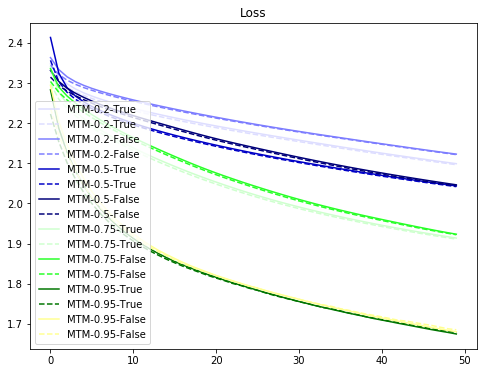

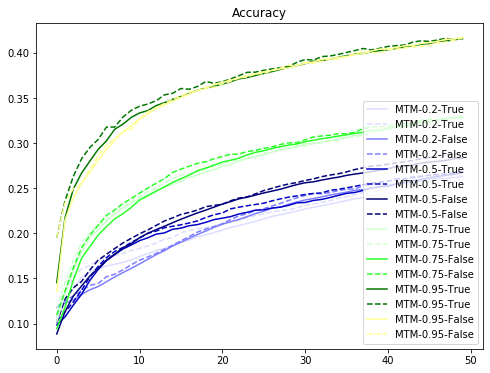

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
# color_bar = ["r", "g", "b", "y", "m", "k", "r", "g", "b", "y", "m", "k"]
color_bar = ['#DDDDFF','#7D7DFF','#0000C6','#000079','#CEFFCE','#28FF28','#007500','#FFFF93']
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

在有開啟NESTEROV下 準確度較快提升，動量較高者也比較有機會加速找到最佳成果